# 图像查重算法评估指标

### 1. 混淆矩阵

<table>
    <tr>
        <td style="font-weight: bold; background: rgba(0,0,0,.6); color: #fff; padding: 20px 30px;"></td>
        <td style="font-weight: bold; background: rgba(0,0,0,.6); color: #fff; padding: 20px 30px;">预测重复</td>
        <td style="font-weight: bold; background: rgba(0,0,0,.6); color: #fff; padding: 20px 30px;">预测不重复</td>
    </tr>
    <tr>
        <td style="font-weight: bold; background: rgba(0,0,0,.6); color: #fff; padding: 20px 30px;">重复</td>
        <td style="text-align: center">A</td>
        <td style="text-align: center">B</td>
    </tr>
    <tr>
        <td style="font-weight: bold; background: rgba(0,0,0,.6); color: #fff; padding: 20px 30px;">不重复</td>
        <td style="text-align: center">C</td>
        <td style="text-align: center">D</td>
    </tr>
</table>

#### 2.  准确率 Accuracy

$$Accuracy=\frac{A+D}{A+B+C+D}$$

#### 3.  精度 Precision

$$Precision=\frac{A}{A+C}$$

#### 4. 召回率 Recall

$$Recall=\frac{A}{A+B}$$

#### 5. F1得分

$$F1 Score=2\cdot\frac{Precision \cdot Recall}{Precision + Recall}$$

#### 6. $F_{\beta}$得分

$$F_{\beta} Score=(1 + N^2)\cdot\frac{Precision \cdot Recall}{N^2 \cdot Precision + Recall}$$

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('dataset_repeat_simto.csv')

guessed_repeat_dataset = dataset[dataset.repeat == 1]
guessed_unrepeat_dataset = dataset[dataset.repeat == 0]

print('Guessed Repeat: \tA + C = {}'.format(len(guessed_repeat_dataset)))
print('Guessed Un-Repeat: \tB + D = {}'.format(len(guessed_unrepeat_dataset)))

Guessed Repeat: 	A + C = 31721
Guessed Un-Repeat: 	B + D = 82170


#### 预测重复

$$A + C = 31721$$

#### 预测不重复数

$$B + D = 82170$$

### 使用长指纹计算结果作为真实重复集

In [3]:
import json

def loadsim(filename):
    with open(filename, 'r') as f:
        res = json.loads(f.readlines()[0])
    return res

In [4]:
test_data = loadsim('test_data.json')

repeats = [1 if len(s[1]) > 0 else 0 for s in test_data]

In [5]:
from pimquery import PImQuery
piq = PImQuery('dataset_hash_int16.csv', 'dataset_with_fp_long.csv')

In [6]:
def predictRepeat():
    predict_data = list()
    for i in range(len(repeats)):
        predict_data.append((i, piq.querySimIdxesByIdx(i)))
    return predict_data

predict_test_data = predictRepeat()
predict_repeats = [1 if len(s[1]) > 0 else 0 for s in predict_test_data]

In [7]:
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [8]:
y_true = repeats
y_pred = predict_repeats
# fbeta_score([1, 2, 3], [1, 3, 5], beta=3, average='macro')
print(accuracy_score(y_true, y_pred))
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))
print(f1_score(y_true, y_pred))

0.861
1.0
0.7274509803921568
0.8422247446083995


In [14]:
errors = list()
rightes = list()

turePoses = list()
falsePoses = list()
falseNegas = list()
trueNegas = list()

for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
        rightes.append(i)
    if y_pred[i] == 1:
        if y_true[i] == 1:
            turePoses.append(i)
        else:
            falsePoses.append(i)
    else:
        if y_true[i] == 1:
            falseNegas.append(i)
        else:
            trueNegas.append(i)

print('Test set number = {}'.format(len(y_pred)))
accuracy = len(rightes) / len(y_pred)
precision = len(turePoses) / (len(turePoses) + len(falsePoses))
recall = len(turePoses) / (len(turePoses) + len(falseNegas))
print('Accuracy = {}'.format(accuracy))
print('Precision = {}'.format(precision))
print('Recall = {}'.format(recall))
print('F1 Score = {}'.format(2*precision*recall/(precision+recall)))

Test set number = 1000
Accuracy = 0.861
Precision = 1.0
Recall = 0.7274509803921568
F1 Score = 0.8422247446083995


In [33]:
print('True Positive = {}'.format(len(turePoses)))
print('False Positive = {}'.format(len(falsePoses)))
print('False Negative = {}'.format(len(falseNegas)))
print('True Negative = {}'.format(len(trueNegas)))

True Positive = 371
False Positive = 0
False Negative = 139
True Negative = 490


对1000张图片，进行测试，得到如下矩阵：

- True Positive: 代表真实重复，算法也查出是重复的图片数量，即正确检测出是重复图片的数量，下图给出结果为 371
- False Positive: 代表真实不重复，算法却查出是重复的图片数量，即误把不重复的图片当成了重复图片，下图给出结果为 0
- False Negative: 代表真实重复，算法却没有查出是重复复的图片数量，即误把重复的图片当成了不重复图片，下图给出结果为 139
- True Negative: 代表真实不重复，算法也认为是不重复的图片数量，即正确检测出不是重复图片的数量，下图给出结果为 490

<table>
    <tr>
        <td style="font-weight: bold; background: rgba(0,0,0,.6); color: #fff; padding: 20px 30px;"></td>
        <td style="font-weight: bold; background: rgba(0,0,0,.6); color: #fff; padding: 20px 30px;">预测重复</td>
        <td style="font-weight: bold; background: rgba(0,0,0,.6); color: #fff; padding: 20px 30px;">预测不重复</td>
    </tr>
    <tr>
        <td style="font-weight: bold; background: rgba(0,0,0,.6); color: #fff; padding: 20px 30px;">重复</td>
        <td style="text-align: center">True Positive = 371</td>
        <td style="text-align: center">False Negative = 139</td>
    </tr>
    <tr>
        <td style="font-weight: bold; background: rgba(0,0,0,.6); color: #fff; padding: 20px 30px;">不重复</td>
        <td style="text-align: center">False Positive = 0</td>
        <td style="text-align: center">True Negative = 490</td>
    </tr>
</table>

由此计算得出查重算法指标：

1. 准确率

$$Accuracy=\frac{371+490}{1000}=0.861$$

2. 精度

$$Precision=\frac{371}{371+0}=1.0$$

3. 召回率

$$Recall=\frac{371}{371+139}=0.727$$

算法速度：0.1s / 10w 即单张图片在十万级图片库里查重，需要 0.1s 秒，1000万查重需要 10s 

In [10]:
from helper import showimg
from PIL import Image
import matplotlib.pyplot as plt
from os import path
import numpy as np

imgs_df = pd.read_csv('dataset.csv') 

def viewFalseNegas(n):
    idx = falseNegas[n]
    imidx, simidxes = test_data[idx]
    im = imgs_df.loc[imidx]['path']
    sims = [imgs_df.loc[idx]['path'] for idx in simidxes]
    num = len(sims)
    fig, axs = plt.subplots(1, num + 1, figsize=(16, 16))
    showimg(np.asarray(Image.open(im)), ax=axs[0], title=path.split(im)[1])
    for i in range(num):
        showimg(np.asarray(Image.open(sims[i])), ax=axs[i+1], title=path.split(sims[i])[1])
    return idx, im, sims

(15,
 'images/train/书房_中式传统/1158644_6101644.jpg',
 ['images/train/书房_中式现代/1571567_8498954.jpg',
  'images/train/书房_美式经典/1072430_5563496.png',
  'images/train/卧室_现代简约/1755347_9571010.png',
  'images/train/卫生间_现代简约/1658129_9008034.jpg',
  'images/train/客厅_现代简约/1091819_5692818.jpg',
  'images/train/客厅_现代简约/542333_2273300.jpg'])

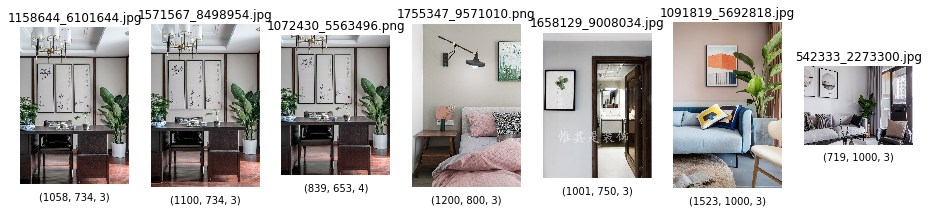

In [32]:
viewFalseNegas(3)
# piq.queryByIdx(307)